# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

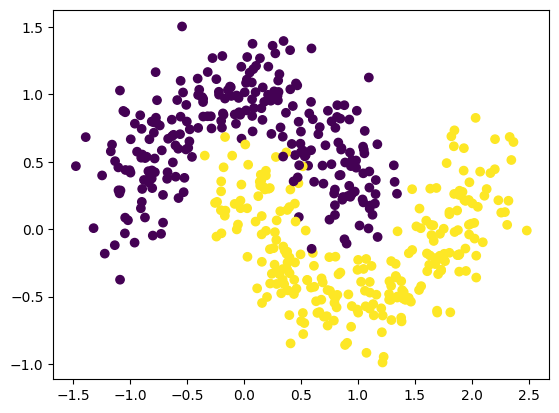

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Logistic Regression Accuracy: 0.86


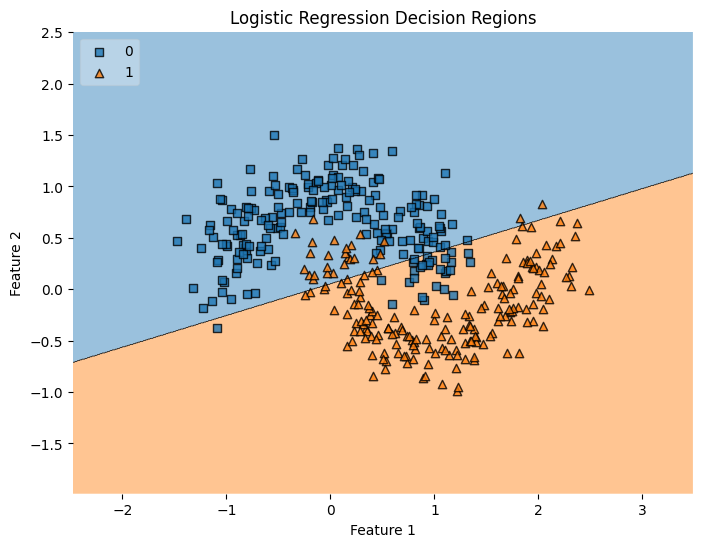

SVM (Linear Kernel) Accuracy: 0.85


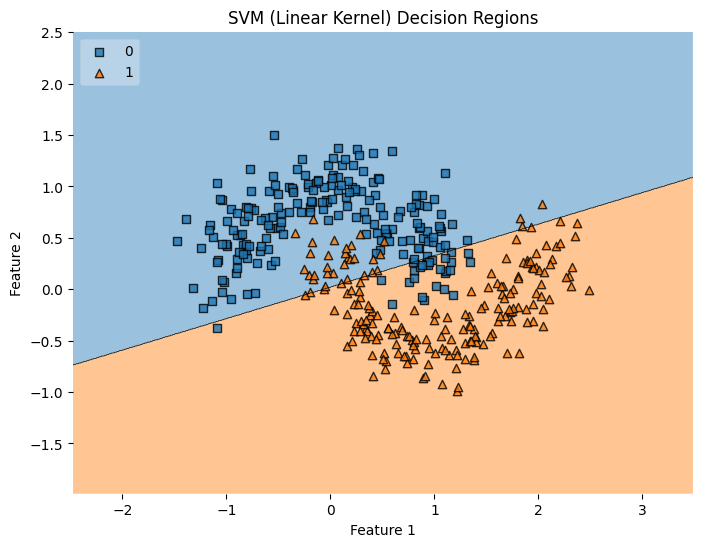

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

# lr = LogisticRegression() # add some params
# svm = SVC(kernel='linear') # here too


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.2, random_state=42)

def plot_decisions(X, y, clf, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

lr = LogisticRegression(C=1.0, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
plot_decisions(X_train, y_train, lr, "Logistic Regression Decision Regions")

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM (Linear Kernel) Accuracy: {accuracy_svm:.2f}")
plot_decisions(X_train, y_train, svm, "SVM (Linear Kernel) Decision Regions")

### YOUR CODE HERE

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

SVM with kernel='poly', params={'degree': 3, 'C': 1.0, 'gamma': 'scale'}, Accuracy: 0.91


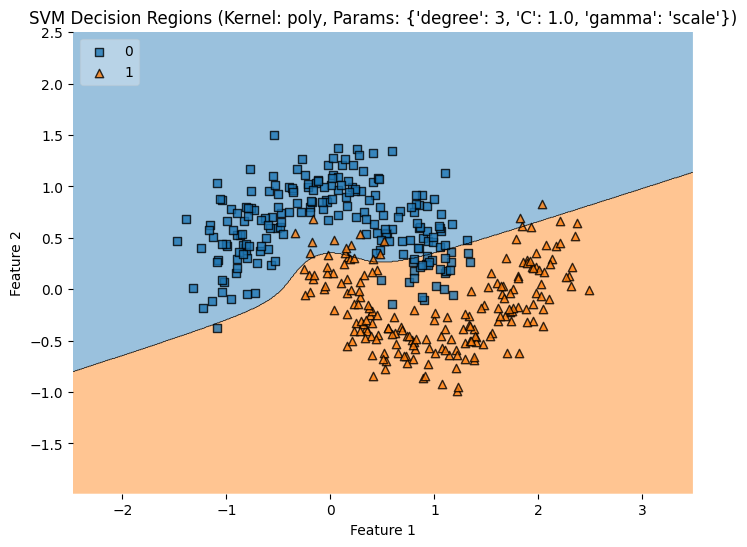

SVM with kernel='rbf', params={'C': 1.0, 'gamma': 0.5}, Accuracy: 0.95


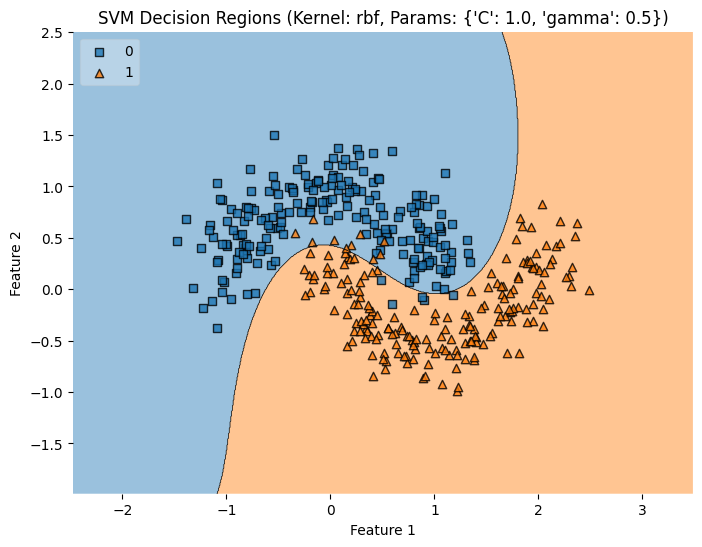

SVM with kernel='sigmoid', params={'C': 1.0, 'gamma': 'scale'}, Accuracy: 0.66


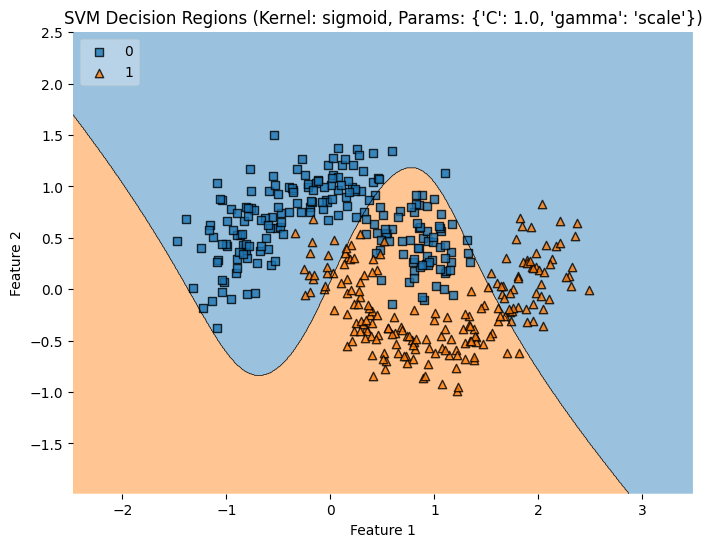

Comparison of Kernel Performances:
Poly Kernel Accuracy: 0.91
RBF Kernel Accuracy: 0.95
Sigmoid Kernel Accuracy: 0.66


In [ ]:
### YOUR CODE HERE

def evaluate_kernel(X_train, X_test, y_train, y_test, kernel, **kwargs):
    svm = SVC(kernel=kernel, **kwargs, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM with kernel='{kernel}', params={kwargs}, Accuracy: {accuracy:.2f}")
    plot_decisions(X_train, y_train, svm, f"SVM Decision Regions (Kernel: {kernel}, Params: {kwargs})")
    return accuracy


accuracy_poly = evaluate_kernel(
    X_train, X_test, y_train, y_test,
    kernel='poly',
    degree=3,  # степень 
    C=1.0,
    gamma='scale'
)


accuracy_rbf = evaluate_kernel(
    X_train, X_test, y_train, y_test,
    kernel='rbf',
    C=1.0,
    gamma=0.5  
)


accuracy_sigmoid = evaluate_kernel(
    X_train, X_test, y_train, y_test,
    kernel='sigmoid',
    C=1.0,
    gamma='scale'
)

print("Сравнение:")
print(f"Poly Kernel: {accuracy_poly:.2f}")
print(f"RBF Kernel: {accuracy_rbf:.2f}")
print(f"Sigmoid Kernel: {accuracy_sigmoid:.2f}")


1. Качество классификации значительно улучшилось при использовании ядер poly и rbf по сравнению с линейным ядром. Лучшие результаты показало ядро rbf

2. - Poly: Граница решений стала криволинейной
   - RBF: Граница стала очень гибкой  
   -Sigmoid : Граница решений стала более плавной, но менее гибкой

3. degree=3, так как это значение обеспечило баланс между гибкостью модели и её способностью обобщать данные. Более высокие значения приводили к переобучению

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Logistic Regression with Polynomial Features (degree=3) Accuracy: 0.95


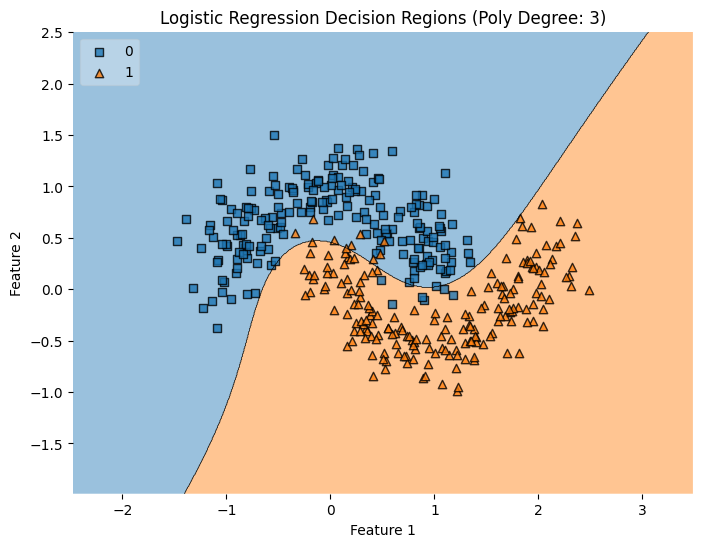

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline


degree = 3  # Степень полинома
poly_lr_pipeline = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LogisticRegression(C=1.0, random_state=42)
)
poly_lr_pipeline.fit(X_train, y_train)
y_pred_poly_lr = poly_lr_pipeline.predict(X_test)
accuracy_poly_lr = accuracy_score(y_test, y_pred_poly_lr)
print(f"Logistic Regression with Polynomial Features (degree={degree}) Accuracy: {accuracy_poly_lr:.2f}")

plot_decisions(X_train, y_train, poly_lr_pipeline, f"Logistic Regression Decision Regions (Poly Degree: {degree})")


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

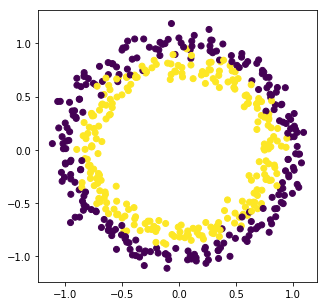

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

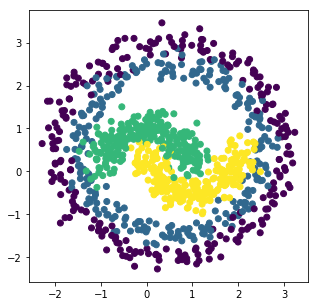

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels);

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

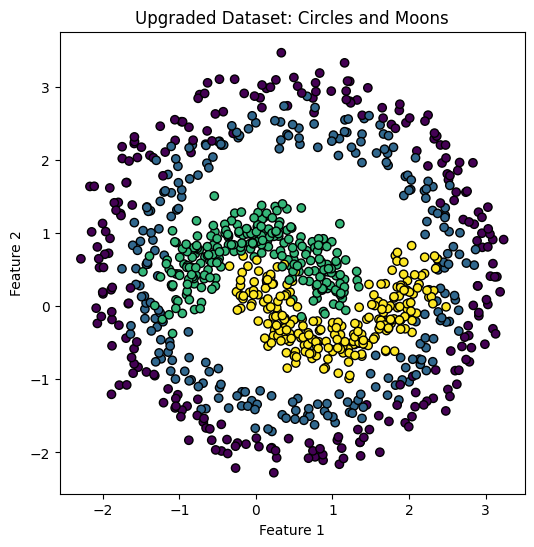

C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Logistic Regression with Polynomial Features (degree=3) Accuracy: 0.80


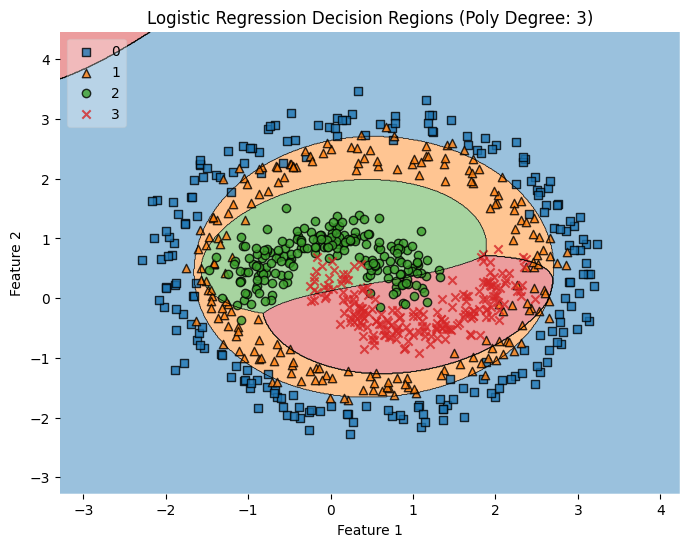

SVM with RBF Kernel Accuracy: 0.94


C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


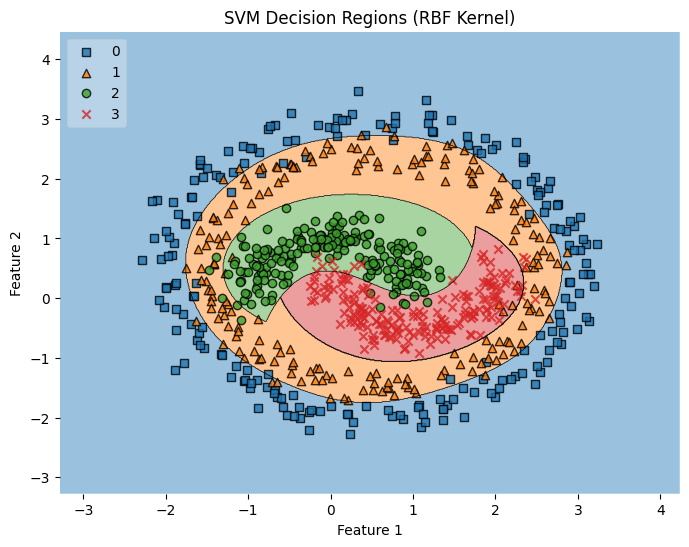

Random Forest Accuracy: 0.88


C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


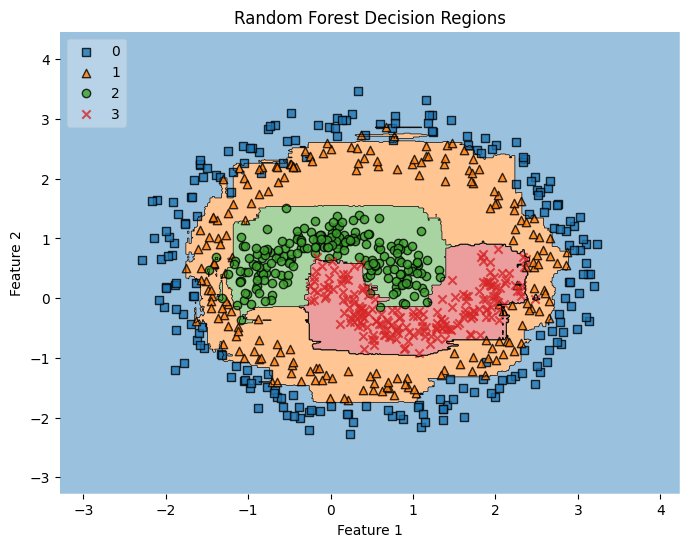

In [ ]:
### YOUR CODE HERE

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomForestClassifier


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)


points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # добавляем +2 к меткам для разделения классов

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title("Upgraded Dataset: Circles and Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=42)

degree = 3
poly_lr_pipeline = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LogisticRegression(C=1.0, random_state=42, multi_class='ovr')
)
poly_lr_pipeline.fit(X_train, y_train)
y_pred_poly_lr = poly_lr_pipeline.predict(X_test)
accuracy_poly_lr = accuracy_score(y_test, y_pred_poly_lr)
print(f"Logistic Regression with Polynomial Features (degree={degree}) Accuracy: {accuracy_poly_lr:.2f}")
plot_decisions(X_train, y_train, poly_lr_pipeline, f"Logistic Regression Decision Regions (Poly Degree: {degree})")

svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print(f"SVM with RBF Kernel Accuracy: {accuracy_svm_rbf:.2f}")
plot_decisions(X_train, y_train, svm_rbf, "SVM Decision Regions (RBF Kernel)")

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
plot_decisions(X_train, y_train, rf, "Random Forest Decision Regions")


SVM с RBF ядром — лучший выбор, так как обеспечивает высокую точность и гибкость, точно моделируя сложные нелинейные зависимости  
Логистическая регрессия с полиномиальными признаками — быстрый и простой подход, подходящий для менее сложных задач, но менее гибки  
Random Forest — универсальный метод с хорошей точностью, но границы решений более сегментированные, чем у SVM  